In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', 
                 header=None, 
                 names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# 1 -Qual o tamanho desse dataset (número de linhas, número de colunas)?
df.shape

(1372, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [59]:
# 2 - Qual variável possui o maior range (diferença entre valor máximo e mínimo)?
result = df.max() - df.min()
result

variance    13.8669
skewness    26.7247
curtosis    23.2135
entropy     10.9977
class        1.0000
dtype: float64

In [95]:
df.max()

variance     6.8248
skewness    12.9516
curtosis    17.9274
entropy      2.4495
class        1.0000
dtype: float64

In [96]:
df.min()

variance    -7.0421
skewness   -13.7731
curtosis    -5.2861
entropy     -8.5482
class        0.0000
dtype: float64

In [61]:
# 3 - Qual a média da coluna skewness?
df['skewness'].describe()

count    1372.000000
mean        1.922353
std         5.869047
min       -13.773100
25%        -1.708200
50%         2.319650
75%         6.814625
max        12.951600
Name: skewness, dtype: float64

In [62]:
# 4 - Qual a média da coluna entropy?
df['entropy'].describe()

count    1372.000000
mean       -1.191657
std         2.101013
min        -8.548200
25%        -2.413450
50%        -0.586650
75%         0.394810
max         2.449500
Name: entropy, dtype: float64

In [63]:
# 5 - Qual a mediana da coluna variance?
df['variance'].median()

0.49618

In [69]:
# 6 -Qual a desvio padrão (std) da coluna curtosis?
df['curtosis'].describe()

count    1372.000000
mean        1.397627
std         4.310030
min        -5.286100
25%        -1.574975
50%         0.616630
75%         3.179250
max        17.927400
Name: curtosis, dtype: float64

In [84]:
# 7 - Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)?
exemplos_falsas = df[df['class'] == 1].value_counts().sum()
exemplos_verdadeiras = df[df['class'] == 0].value_counts().sum()
total_notas = df['class'].value_counts().sum()
porcent_falsas = (exemplos_falsas/total_notas)*100
porcent_falsas

44.460641399416915

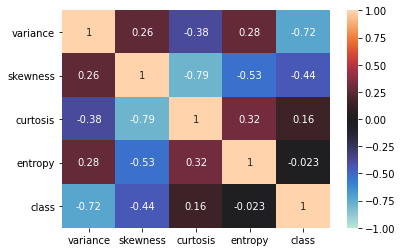

In [88]:
# 8 - Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis
colunas_corr = df[['variance', 'skewness', 'curtosis', 'entropy', 'class']]
matriz_correlacao = colunas_corr.corr()
sn.heatmap(matriz_correlacao,annot=True,vmin=-1, vmax=1,center= 0)
plt.show()

In [6]:
#carrega o train_test_split
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset

In [8]:
#transforma os dados em array
X = df.iloc[:,:4] #dados de entrada
y = df.iloc[:, 4] #dados de saída
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [10]:
#realiza a divisão dos dados entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1,) #divide em 30% o dataset para teste

**KNN**

In [13]:
#importando o algorito KNN
from sklearn.neighbors import KNeighborsClassifier

In [14]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)#utiliza a construção por meio de 5 vizinhos

In [15]:
clf_KNN.fit(X_train, y_train)# aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
#realiza a previsão
y_pred = clf_KNN.predict(X_test)

In [19]:
# 9 - Qual a acurácia do KNN no conjunto de teste?
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[234   1]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



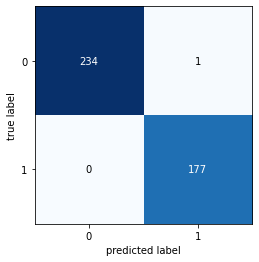

In [21]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**_**

**Árvore de Decisão**

In [22]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

In [23]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier(random_state=1)

In [24]:
# Realiza o treinamento do classificador
clf_arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [26]:
#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(X_test)

In [89]:
# 10 - Qual a acurácia da Árvore de Decisão no conjunto de teste?
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



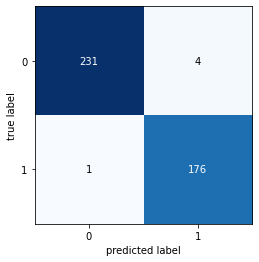

In [27]:
#Avaliando o modelo 
#realiza o plot da matriz de confusão
matriz_confusao_arvore = confusion_matrix(y_test, y_pred_arvore)

fig, ax = plot_confusion_matrix(matriz_confusao_arvore)
plt.show()

_

**Random Forest**

In [30]:
# Importando o algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)

In [32]:
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [33]:
#Realizando a predição
y_pred_floresta = clf_floresta.predict(X_test)

In [90]:
# 11 - Qual a acurácia do Random Forest no conjunto de teste?
print(classification_report(y_test, y_pred_floresta))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       235
           1       0.99      1.00      0.99       177

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [92]:
# 12 -Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), 
#qual feature melhor contribuiu para a predição de class?
#13 - Qual o valor da importância relativa da feature skewness?
feature_importance = pd.DataFrame({'features': X_train.columns,'importance': clf_floresta.feature_importances_})
feature_importance

,features,importance
0,variance,0.560667
1,skewness,0.240586
2,curtosis,0.140228
3,entropy,0.058519


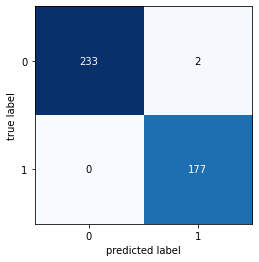

In [34]:
matriz_confusao_floresta = confusion_matrix(y_test, y_pred_floresta)
fig, ax = plot_confusion_matrix(matriz_confusao_floresta)
plt.show()

**_**

**SVM**

In [35]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [36]:
clf_svm = SVC(gamma='auto', kernel='rbf', random_state=1)

In [37]:
#Realiza o treinamento do modelo
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [38]:
y_pred_svm = clf_svm.predict(X_test)

In [93]:
#14 - Qual a acurácia do SVM no conjunto de teste?
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



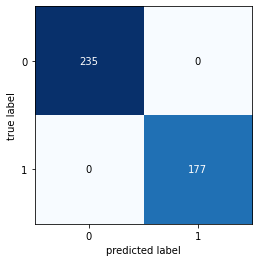

In [39]:
matriz_confusao_svm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plot_confusion_matrix(matriz_confusao_svm)
plt.show()

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,),
                        solver='lbfgs',
                        random_state=1)

In [ ]:
# Realizando o treinamento do modelo
clf_mlp.fit(X_train, y_train)

In [43]:
# Realiza a predição
y_pred_mlp = clf_mlp.predict(X_test)

In [94]:
# 15 - Qual a acurácia da rede MLP no conjunto de teste?
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



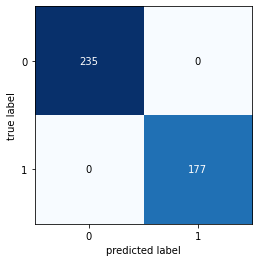

In [44]:
matriz_confusao_mlp = confusion_matrix(y_test, y_pred_mlp)
fig, ax = plot_confusion_matrix(matriz_confusao_mlp)
plt.show()